<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/CNN_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [60]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [57]:


# 파일에 들어있는 이미지 갯수 확인하기 
os.chdir('/content/gdrive/MyDrive/cnn_cats_dogs/dataset/train')
file_name = os.listdir()
cwd = os.getcwd()
img_path = [] 
train_path = os.path.join(cwd,file_name[0])
# print(file_name[0],":",len(os.listdir(path)))
os.chdir('/content/gdrive/MyDrive/cnn_cats_dogs/dataset/test1')
file_name = os.listdir()
cwd = os.getcwd()
test_path = os.path.join(cwd,file_name[0])

# for i in range(len(file_name)):
  
#   path = os.path.join(cwd, file_name[i])
  # print(file_name[i],":",len(os.listdir(path)))
  # # 파일에 들어있는 이미지의 경로를 리스트 형태로 구현 
  # img_path.append(list(glob.glob(os.path.join(path,"*"))))

In [63]:
base_dir = '/content/gdrive/MyDrive/cnn_cats_dogs/'
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
# train_dir
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [71]:
original_dataset_dir_train = os.path.join(base_dir,'dataset/train/train')
original_dataset_dir_test = os.path.join(base_dir,'dataset/test1/test1')

In [66]:
os.getcwd()

'/content/gdrive/MyDrive/cnn_cats_dogs'

In [68]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [72]:
#file copy

fnames = []
# for i in range(1000):
#   filename = 'cat.{}.jpg'.format(i)
#   fnames.append(filename)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [73]:
#cat validation copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)
#dog validation copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [74]:
#cat test copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)
#dog test copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [77]:
print('Train cat images : ', len(os.listdir(train_cats_dir)))
print('Train dog images : ', len(os.listdir(train_dogs_dir)))
print('validation cat images : ', len(os.listdir(validation_cats_dir)))
print('validation dog images : ', len(os.listdir(validation_dogs_dir)))
print('test cat images : ', len(os.listdir(test_cats_dir)))
print('test dog images : ', len(os.listdir(test_dogs_dir)))

Train cat images :  1000
Train dog images :  1000
validation cat images :  500
validation dog images :  500
test cat images :  500
test dog images :  500


In [116]:
#build network
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation = 'relu'))
  model.add(layers.Dense(1,activation = 'sigmoid'))

  return model

model = build_model()
model.summary()

  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [119]:
from tensorflow.keras import optimizers
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [115]:
#Data preprocessing

#image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150), batch_size = 20, class_mode = 'binary')
validation_generator = train_datagen.flow_from_directory(validation_dir,target_size = (150,150), batch_size = 20, class_mode = 'binary')
# test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [91]:
for data_batch, labels_batch in train_generator:
  print('Batch Data Size : ', data_batch.shape)
  print('Batch Label Size :', labels_batch.shape)
  break

Batch Data Size :  (20, 150, 150, 3)
Batch Label Size : (20,)


In [92]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs=30, validation_data = test_generator, validation_steps= 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.7119 - accuracy: 0.5320 - val_loss: 0.6863 - val_accuracy: 0.5480
Epoch 2/30
100/100 [==============================] - 122s 1s/step - loss: 0.6641 - accuracy: 0.6180 - val_loss: 0.6483 - val_accuracy: 0.6150
Epoch 3/30
100/100 [==============================] - 124s 1s/step - loss: 0.6110 - accuracy: 0.6695 - val_loss: 0.6277 - val_accuracy: 0.6570
Epoch 4/30
100/100 [==============================] - 121s 1s/step - loss: 0.5763 - accuracy: 0.7010 - val_loss: 0.6478 - val_accuracy: 0.6460
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.4914 - accuracy: 0.7630 - val_loss: 0.6244 - val_accuracy: 0.6680
Epoch 6/30
100/100 [==============================] - 123s 1s/step - loss: 0.4158 - accuracy: 0.7950 - val_loss: 0.6972 - val_accuracy: 0.6840
Epoch 7/30
100/100 [==============================] - 123s 1s/step - loss: 0.3151 - accuracy: 0.8605 - val_loss: 0.7674 - val_accuracy: 0.6950

KeyboardInterrupt: ignored

In [93]:
model.save('cats_and_dogs_1.0.h5')

In [94]:

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b-', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation loss')
plt.title('Training and Validation loss')



NameError: ignored

In [98]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )


In [107]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path,target_size = (150,150))

In [109]:
x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

<function matplotlib.pyplot.show(*args, **kw)>

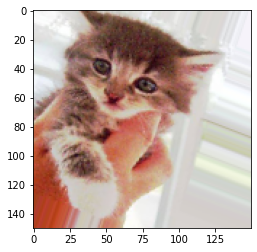

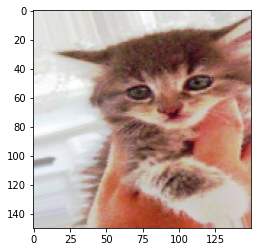

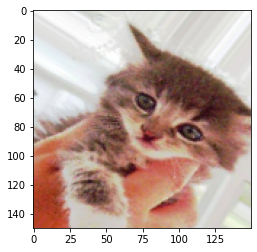

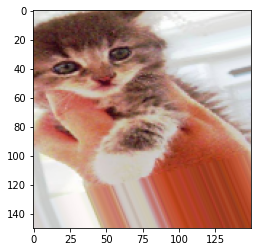

In [113]:
import matplotlib.pyplot as plt

i = 0

for batch in datagen.flow(x,batch_size = 1):
  plt.figure(i)
  implot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break

plt.show

In [120]:
train_datagen = ImageDataGenerator(    rescale=1./255,    rotation_range=40,    width_shift_range=0.2,    height_shift_range=0.2,    shear_range=0.2,    zoom_range=0.2,    horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),        batch_size=32,   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(        validation_dir,        target_size=(150, 150),        batch_size=32,        class_mode='binary')
history = model.fit_generator(      train_generator,      steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
 63/100 [=================>............] - ETA: 57s - loss: 0.7388 - accuracy: 0.5135

100/100 [==============================] - 120s 1s/step - loss: 0.7388 - accuracy: 0.5135 - val_loss: 0.6815 - val_accuracy: 0.5570
